In [2]:
from konlpy.tag import Kkma 
k = Kkma()
k.pos("안녕하세요.")


[('안녕', 'NNG'), ('하', 'XSV'), ('세요', 'EFN'), ('.', 'SF')]

In [3]:
import numpy as np
import pandas as pd
import re
import networkx as nx
import konlpy

import matplotlib.pyplot as plt

In [14]:
df = pd.read_excel('data/NewsResult_20180901-20210901.xlsx', sheet_name = 'sheet', index_col = '일자', parse_dates = True)
df[:10]

C:\Users\CPB06GameN\anaconda3\lib\site-packages\openpyxl\styles\stylesheet.py:221: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


,뉴스 식별자,언론사,기고자,제목,통합 분류1,통합 분류2,통합 분류3,사건/사고 분류1,사건/사고 분류2,사건/사고 분류3,인물,위치,기관,키워드,특성추출(가중치순 상위 50개),본문,URL,분석제외 여부
일자,,,,,,,,,,,,,,,,,,
2021-09-01,2.100101e+06,매일경제,이다겸,"아이유, ‘가을 여신’의 우아美[화보]",문화>방송_연예,문화>영화,문화>음악,NaN,NaN,NaN,"강동원,배두나,고레에다 히로카즈,송강호,아이유",한국,"ESTINA,제이에스티나,마이 라이프","가을,여신,우아,화보,가수,가수,배우,아이유,매력,제이에스티나,주얼리,브랜드,J.E...","아이유,스타투데이,한국,제이에스티나,뮤즈,이어링,네크리스,플리츠,배두나,강동원,히로...",가수 겸 배우 아이유가 우아한 매력을 뽐냈다. \n주얼리 브랜드 제이에스티나(J.E...,http://star.mk.co.kr/new/view.php?mc=ST&year=2...,예외
2021-09-01,1.101101e+06,한국일보,정한별,"박지성, '유 퀴즈 온 더 블럭' 뜬다 ""촬영 완료""",스포츠>축구>국가대표팀,스포츠>축구>해외축구,스포츠>축구,NaN,NaN,NaN,"배두나,박지성,유재석,방탄소년단,조세호,아이유,신하균",NaN,"tvN,MBC","박지성,블럭,촬영,축구,선수,박지성,퀴즈,블럭,tvN,퀴즈,블럭,관계자,본지,박지성...","박지성,쓰리박,소년단,유명인,예능감,아이유,유명인들,tvn,mbc,신하균,배두,조세...",전 축구선수 박지성이 ‘유 퀴즈 온 더 블럭’에 뜬다.\n1일 tvN ‘유 퀴즈 온...,https://hankookilbo.com/News/Read/A20210901155...,NaN
2021-09-01,8.100401e+06,YTN,강내리,"[스타,일] 아이유가 전하는 가을의 선율 기타 들고 우아한 포즈",문화>방송_연예,문화>음악,문화>출판,NaN,NaN,NaN,아이유,NaN,"YTN,컨템포러리","아이유,가을,선율,기타,포즈,가수,가수,배우,아이유,가을,여신,변신,제이에스티나,주...","아이유,네크리스,제이에스티나,쉐입,쁘띠,매력적,세레나,라라제이,마리벨,감각적,te,...",가수 겸 배우 아이유가 가을의 여신으로 변신했다.\n\n주얼리 브랜드 제이에스티나(...,https://star.ytn.co.kr/_sn/0117_20210901155331...,NaN
2021-09-01,8.100401e+06,YTN,곽현수,'라이언 전 제작' 걸그룹 버가부(bugAboo) 10월 데뷔 목표 준비 中,문화>방송_연예,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"YTN,NCT127,한창,제이지스타,버가부","라이언,제작,버가부,bugAboo,데뷔,준비,버가부,신인,걸그룹,bugAboo,공개...","버가부,궁금증,걸그룹,라이언,티저가,티저,멤버들,그룹들,제이지스타,team,오마이걸...",신인 걸그룹 버가부(bugAboo)가 공개됐다. \n\n1일 0시 버가부 공식 SN...,https://star.ytn.co.kr/_sn/0117_20210901110407...,NaN
2021-09-01,2.100311e+06,서울경제,추승현 기자,'신인 걸그룹' 버가부 10월 데뷔 예고 라이언 전 첫 자체 제작 아이돌 어떨까,미분류,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"NCT127,K-POP,한창,버가부","신인,걸그룹,버가부,데뷔,예고,라이언,아이돌,자체,제작,걸그룹,K-POP,대표,버가...","버가부,걸그룹,라이언,티저가,멤버들,그룹들,오마이걸,anytime,meet,anyd...",K-POP 대표 걸그룹을 꿈꾸는 버가부(bugAboo)가 데뷔를 예고했다. \n \...,http://www.sedaily.com/NewsView/22RAMPYFYQ,NaN
2021-09-01,1.100801e+06,조선일보,이기문 기자,"당신은 ‘딱복’입니까, ‘물복’입니까",문화>출판,문화>방송_연예,NaN,NaN,NaN,NaN,"정세균,윤석열,김경빈,검찰총장,이낙연,아이유","개성,미국","임명호,유튜브,민초단,더불어민주당,민트초코,심리학과,MBTI,단국대,국민의힘","딱복,물복,issue,취향,존중,강요인가,민초단,질문,당황,민초단,민트,초콜릿,아이...","아이스크림,사람들,호불호,인스타그램,물복,경제지,미국,온라인,소셜,단국대,임명호,방...",“혹시 민초단이세요?” 이런 질문에 당황하지 말 것. ‘민초단(團)’은 ‘민트’와 ...,https://www.chosun.com/culture-life/culture_ge...,NaN
2021-08-31,2.100101e+06,매일경제,신영은,"방탄소년단 슈가, 책과 잘 어울리는 스타 1위",문화>방송_연예,NaN,NaN,NaN,NaN,NaN,NaN,양지은,NaN,"방탄,소년단,슈가,스타,그룹,방탄,소년단,BTS,멤버,슈가,독서,계절,스타,1위,선...","윤경,아이돌차트,투표수,1위,방탄소년단,이대휘,스타투데이,투표율,소년단,스타투,김재...","그룹 방탄소년단(BTS)의 멤버 슈가가 '독서의 계절, 책과 잘 어울리는 스타' 1...",http://star.mk.co.kr/new/view.php?mc=ST&year=2...,NaN
2021-08-31,2.100101e+06,매일경제,성정은,'10억뷰 D-7'...임영웅 유튜브 채널 9억9천만뷰 돌파,문화>방송_연예,NaN,NaN,NaN,NaN,NaN,"덕이,임영웅",NaN,"유튜브,대국","10억,D-,임영웅,9억,유튜브,채널,돌파,가수,임영웅,공식,유튜브,채널,조회,돌파...","임영웅,10억,팬덤,트로트,조회수,9억,유튜브,영웅시대,트로트가수,1000만,대기록...",가수 임영웅의 공식 유튜브 채널 조회수가 9억 9000만 뷰를 돌파했다. 9월 초 ...,http://star.mk.co.kr/new/view.php?mc=ST&year=2...,NaN
2021-08-31,1.100701e+06,세계일보,김찬영,"김이나 ""임영웅 덕분에 저작권료가 ” 대체 얼마길래?",문화>방송_연예,문화>음악,문화>출판,NaN,NaN,NaN,"이지은,김이나,조용필,윤종신,아이유,브라운아이드걸스",NaN,NaN,"임영웅,덕분,저작권료,얼마,카카오,TV,오리지널,캡처,작사,김이나,저작권료,언급,김...","김이나,임영웅,저작권료,임영웅님,이지은,잔소리,브라운아이드,걸스,아이유,아브라카다브...",카카오TV 오리지널 ‘톡이나 할까?’ 캡처 \n 작사가 김이나가 저작권료를 언급했다...,http://www.segye.com/content/html/2021/08/31/2...,NaN


C:\Users\CPB06GameN\anaconda3\lib\site-packages\openpyxl\styles\stylesheet.py:221: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


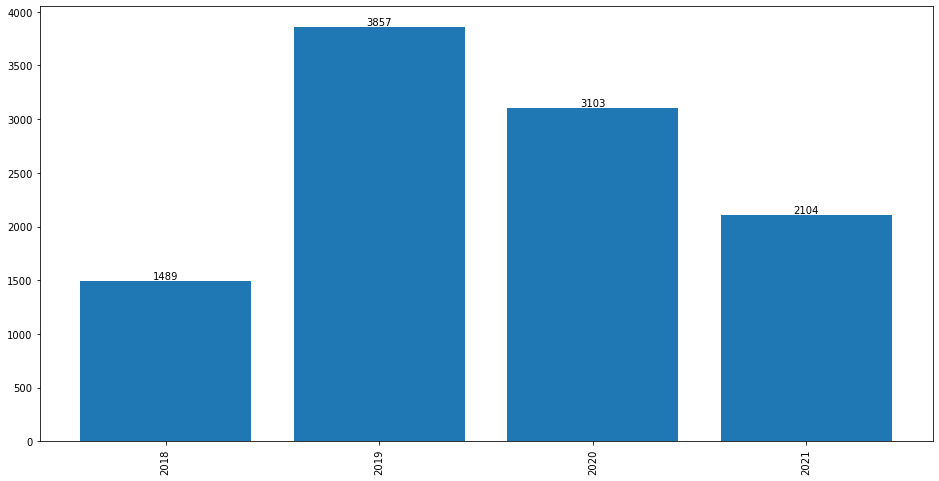

In [15]:
df = pd.read_excel('data/NewsResult_20180901-20210901.xlsx', sheet_name = 'sheet', index_col = '일자', parse_dates = True)
df1 = df.groupby(df.index.year).size()
f, ax = plt.subplots(figsize = (16, 8))
plt.xticks(df1.index, rotation = 90)
plot = ax.bar(df1.index, df1.values)
for rect in plot:
  height = rect.get_height()
  ax.text(rect.get_x() + rect.get_width()/2., height, '%d' %int(height), ha = 'center', va = 'bottom')

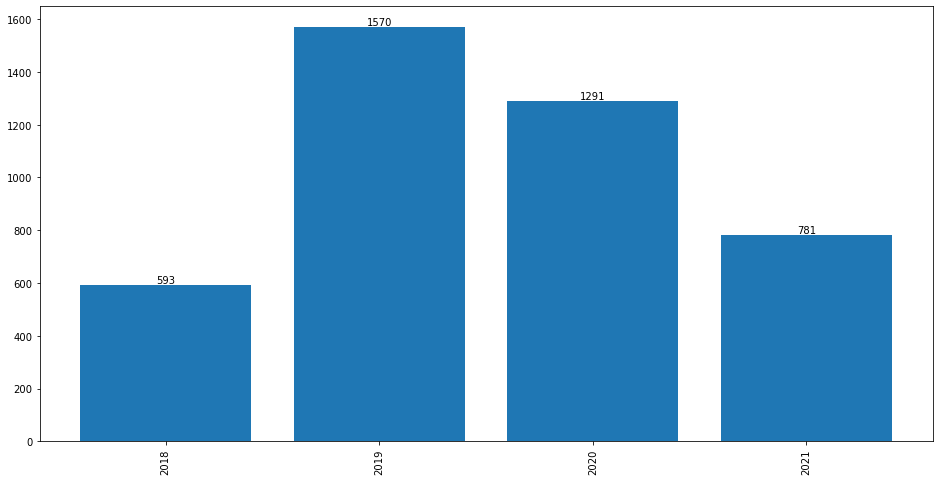

In [16]:
df2 = df[df['제목'].str.contains('가수') | df['본문'].str.contains('가수')]
df2 = df2.groupby(df2.index.year).size()
f, ax = plt.subplots(figsize = (16, 8))
plt.xticks(df2.index, rotation = 90)
plot = ax.bar(df2.index, df2.values)
for rect in plot:
  height = rect.get_height()
  ax.text(rect.get_x() + rect.get_width()/2., height, '%d' %int(height), ha = 'center', va = 'bottom')

C:\Users\CPB06GameN\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 51068 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\CPB06GameN\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 51088 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\CPB06GameN\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 50500 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\CPB06GameN\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 51060 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\CPB06GameN\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 50976 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\CPB06GameN\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarni

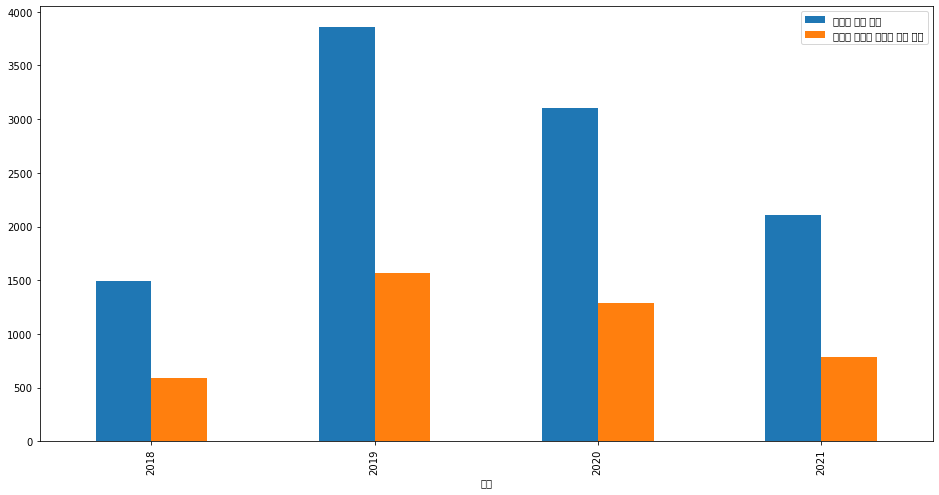

In [17]:
pd.concat([df1, df2], axis = 1).plot(kind = 'bar', figsize = (16, 8))
plt.legend(['아이유 기사 건수', '가수가 언급된 아이유 기사 건수'])

In [18]:
df[['제목']].to_csv('아이유_제목.txt', index = False, header = False)
f = open('아이유_제목.txt', 'r', encoding = 'UTF-8')
lines = f.readlines()
f.close()

In [9]:
import konlpy
from konlpy.tag import Hannanum
hannanum = Hannanum()

In [39]:
from konlpy.tag import Komoran

komoran = Komoran()

print(komoran.morphs(u'우왕 코모란도 오픈소스고 되었네'))

['우왕', '코', '모란', '도', '오픈', '소스', '이', '고', '되', '었', '네']


In [19]:
dataset = []
for i in range(len(lines)):
  dataset.append(hannanum.nouns(re.sub('[^가-힣a-zA-Z\s]', '', lines[i])))
dataset[:10]

[['아이유', '여신', '우아화보'],
 ['박지성', '유', '퀴즈', '블럭', '촬영', '완료'],
 ['스타', '아이유', '가을', '선율', '기타', '우아한', '포즈'],
 ['라이언', '전', '제작', '걸그룹', '버가부bugAboo', '월', '데뷔', '목표', '준비'],
 ['신',
  '걸그룹',
  '버가부',
  '월',
  '데뷔',
  '예고',
  '라이언',
  '전',
  '첫',
  '자체',
  '제작',
  '아이돌',
  '어떨까'],
 ['당신', '딱복입니까', '물복'],
 ['방탄소년단', '슈가', '책', '스타', '위'],
 ['억뷰', 'D임영웅', '유튜브', '채널', '억천만뷰', '돌파'],
 ['김', '임영웅', '덕분', '저작권료', '얼마'],
 ['궁금', '때', '차트', '영화', '예매율', '외']]

In [11]:
import scipy.sparse

In [22]:
from mlxtend.preprocessing import TransactionEncoder

te = TransactionEncoder()
te_ary = te.fit(dataset).transform(dataset)
df = pd.DataFrame(te_ary, columns = te.columns_)

# '라디오', '밤편지', '유애나', '음원', '팔레트'
df[['라디오', '밤편지', '유애나', '음원', '팔레트']].head(10)

,라디오,밤편지,유애나,음원,팔레트
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
5,False,False,False,False,False
6,False,False,False,False,False
7,False,False,False,False,False
8,False,False,False,False,False
9,False,False,False,False,False


In [23]:
# Apriori
from mlxtend.frequent_patterns import apriori

# 지지도(support) 
frequent_itemsets = apriori(df, min_support = 0.01, use_colnames = True)
frequent_itemsets['length'] = frequent_itemsets['itemsets'].apply(lambda x: len(x))
frequent_itemsets[(frequent_itemsets['length'] == 2) & 
                 (frequent_itemsets['support'] >= 0.01)].sort_values(by = 'support', ascending = False).head(10)

,support,itemsets,length
62,0.050123,"(호텔, 델루)",2
57,0.028994,"(공개, 아이유)",2
76,0.025772,"(아이유, 포토)",2
69,0.019519,"(아이유, 위)",2
60,0.019424,"(아이유, 델루)",2
77,0.019234,"(아이유, 호텔)",2
58,0.017529,"(아이유, 기부)",2
72,0.014118,"(아이유, 출연)",2
64,0.013549,"(방탄소년단, 위)",2
67,0.012981,"(아이유, 억)",2


In [24]:
# 연관규칙 ( Association Rules)

from mlxtend.frequent_patterns import association_rules
association_rules(frequent_itemsets, metric = 'confidence', 
                  min_threshold = 0.7).sort_values(by = 'lift', ascending = False).head(10)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
10,"(여진구, 호텔)",(델루),0.010707,0.052587,0.010138,0.946903,18.006506,0.009575,17.842951
0,(호텔),(델루),0.053724,0.052587,0.050123,0.932981,17.741761,0.047298,14.136404
1,(델루),(호텔),0.052587,0.053724,0.050123,0.953153,17.741761,0.047298,20.199359
8,"(아이유, 호텔)",(델루),0.019234,0.052587,0.017908,0.931034,17.704753,0.016896,13.737493
9,"(아이유, 델루)",(호텔),0.019424,0.053724,0.017908,0.921951,17.160976,0.016864,12.124165
11,"(여진구, 델루)",(호텔),0.011181,0.053724,0.010138,0.906780,16.878576,0.009538,10.150964
6,(아차랭킹),(위),0.010517,0.060641,0.010233,0.972973,16.044932,0.009595,34.756301
7,(연속),(위),0.012791,0.060641,0.010044,0.785185,12.948194,0.009268,4.372880
2,(삐삐),(아이유),0.011086,0.391131,0.010612,0.957265,2.447426,0.006276,14.247527
5,(투),(아이유),0.012886,0.391131,0.011370,0.882353,2.255899,0.006330,5.175384


In [25]:
from apyori import apriori

result = (list(apriori(dataset, min_support = 0.01)))
df = pd.DataFrame(result)
df['length'] = df['items'].apply(lambda x: len(x))
df = df[(df['length'] == 2) & (df['support'] >= 0.01)].sort_values(by = 'support', ascending = False)
df.head(10)

,items,support,ordered_statistics,length
62,"(호텔, 델루)",0.050123,"[((), (델루, 호텔), 0.0501231760469964, 1.0), ((델루...",2
57,"(공개, 아이유)",0.028994,"[((), (공개, 아이유), 0.028993746446844798, 1.0), (...",2
76,"(아이유, 포토)",0.025772,"[((), (아이유, 포토), 0.025772219063862043, 1.0), (...",2
69,"(아이유, 위)",0.019519,"[((), (아이유, 위), 0.019518665908660224, 1.0), ((...",2
60,"(아이유, 델루)",0.019424,"[((), (아이유, 델루), 0.01942391510327838, 1.0), ((...",2
77,"(아이유, 호텔)",0.019234,"[((), (아이유, 호텔), 0.019234413492514688, 1.0), (...",2
58,"(아이유, 기부)",0.017529,"[((), (아이유, 기부), 0.017528898995641463, 1.0), (...",2
72,"(아이유, 출연)",0.014118,"[((), (아이유, 출연), 0.014117870001895017, 1.0), (...",2
64,"(방탄소년단, 위)",0.013549,"[((), (방탄소년단, 위), 0.013549365169603941, 1.0), ...",2
67,"(아이유, 억)",0.012981,"[((), (아이유, 억), 0.012980860337312867, 1.0), ((...",2


In [26]:
# Networkx 그래프 정의
G = nx.Graph()
ar = (df['items'])
G.add_edges_from(ar)

In [28]:
# 페이지랭크
pr = nx.pagerank(G)
nsize = np.array([v for v in pr.values()])
nsize = 2000 * (nsize - min(nsize)) / (max(nsize) - min(nsize))

In [30]:
# 레이아웃
pos = nx.planar_layout(G)

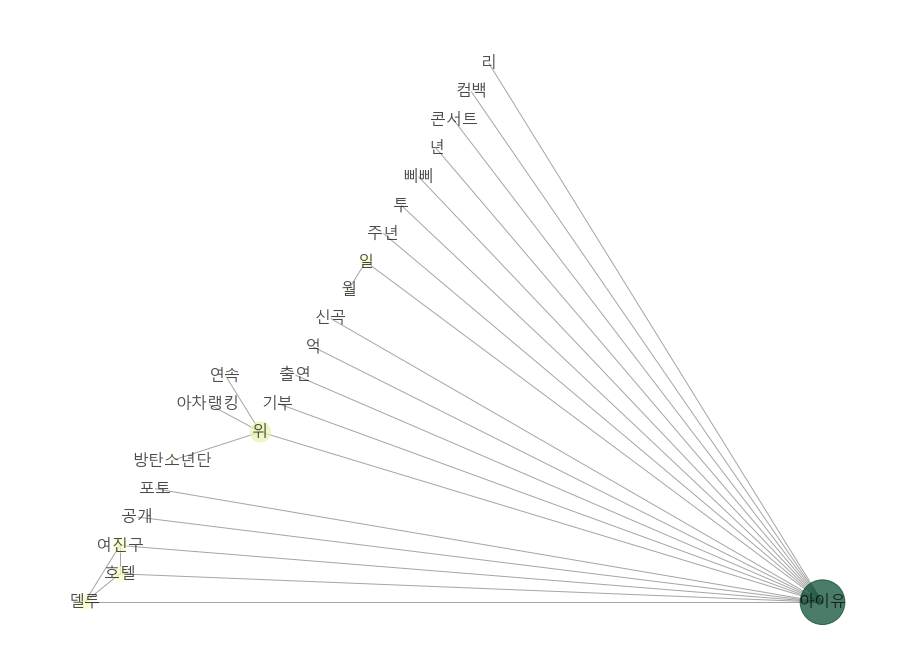

In [31]:
# 네트워크 그래프
plt.figure(figsize = (16, 12))
plt.axis('off')
nx.draw_networkx(G, font_family = 'Malgun Gothic', font_size = 16, pos = pos, node_color = list(pr.values()),
                node_size = nsize, alpha = 0.7, edge_color = '.5', cmap = plt.cm.YlGn)

In [15]:
#!pip install apyori

  Created wheel for apyori: filename=apyori-1.1.2-py3-none-any.whl size=5974 sha256=932a03ff58703909fc0f4943c380ec04130f651a4e04f2c5970d526a6233be31
  Stored in directory: c:\users\cpb06gamen\appdata\local\pip\cache\wheels\1b\02\6c\a45230be8603bd95c0a51cd2b289aefdd860c1a100eab73661
Successfully built apyori


In [1]:
#!pip install git+git://github.com/rasbt/mlxtend.git

  Cloning git://github.com/rasbt/mlxtend.git to c:\users\cpb06gamen\appdata\local\temp\pip-req-build-omi4xts1
  Resolved git://github.com/rasbt/mlxtend.git to commit 6585e23fb4e2fb0b146ca77eb4822013584fe66b
  Created wheel for mlxtend: filename=mlxtend-0.19.0-py2.py3-none-any.whl size=1349757 sha256=7dfe7817d8213f4ec1695f7cc29f4c767a2e2f06222d7d5904c6322204a5841d
  Stored in directory: C:\Users\CPB06GameN\AppData\Local\Temp\pip-ephem-wheel-cache-yam1jjmr\wheels\98\31\bc\9bea632ee0ab991ff9cc782a901909c85ab0c33355d76fa549
Successfully built mlxtend


  Running command git clone -q git://github.com/rasbt/mlxtend.git 'C:\Users\CPB06GameN\AppData\Local\Temp\pip-req-build-omi4xts1'
